# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Amin Afif Rafi''i
- **Email:** m263b4ky0464@bangkit.academy
- **ID Dicoding:** meeru19

## Menentukan Pertanyaan Bisnis

- Apa kategori item yang paling banyak terjual?
- Apa kategori item yang menghasilkan pendapatan paling besar?
- Apa kategori item yang paling sedikit terjual?
- Apa kategori item yang menghasilkan pendapatan paling kecil?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian?
- Berapa banyak uang yang dihabiskan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv('customers_dataset.csv')
order_items_df = pd.read_csv('order_items_dataset.csv')
orders_df = pd.read_csv('orders_dataset.csv')
product_category_name_df = pd.read_csv('product_category_name_translation.csv')
products_df = pd.read_csv('products_dataset.csv')

**Insight:**
- Kita membaca 5 dataset yang dibutuhkan untuk menjawab pertanyaan bisnis menggunakan read_csv() dari library pandas
- Kita hanya membaca 5 dataset dari 9 dataset yang ada, yang mana ini meningkatkan performa

### Assessing Data

In [3]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [5]:
customers_df.duplicated().sum()

0

In [6]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [7]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [9]:
order_items_df.duplicated().sum()

0

In [10]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [11]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Tipe data kolom yang berhubungan dengan tanggal harus diubah ke datetime dan drop missing value karena kita hanya membutuhkan order yang sudah selesai

In [12]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Drop missing value karena kita hanya membutuhkan order yang sudah selesai

In [13]:
orders_df.duplicated().sum()

0

In [14]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


order_id yang duplikat harus kita hapus

In [15]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [16]:
product_category_name_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [17]:
product_category_name_df.duplicated().sum()

0

In [18]:
product_category_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [19]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [20]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Kita harus mengisi (fill) missing value di product_category_name

In [21]:
products_df.duplicated().sum()

0

In [22]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Tipe data kolom yang berhubungan dengan tanggal harus diubah ke datetime, order_id duplikat harus kita drop, dan drop missing value karena kita hanya membutuhkan order yang sudah selesai pada orders_df
- Kita harus menerapkan metode imputation pada products_df['product_category_name'] yang mengandung missing value

### Cleaning Data

In [23]:
# Menghapus missing value di orders_df
orders_df.dropna(inplace=True)


# Mengubah tipe data di orders_df
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])


# Menghapus data yang duplikat pada order_id di orders_df
orders_df.drop_duplicates(subset='order_id', inplace=True)


# Mengisi missing value di product_category_name
products_df['product_category_name'].fillna(value='others', inplace=True)

<ipython-input-23-5d56907bbc26>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna(value='others', inplace=True)


In [24]:
#TEST missing value dan tipe data di orders_df

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [25]:
# TEST data duplikat di orders_df['order_id']

orders_df['order_id'].duplicated().sum()

0

In [26]:
# TEST missing value di product_category_name

products_df['product_category_name'].isna().sum()

0

**Insight:**
- Membersihkan dataset sesuai kebutuhan analisis dengan menghapus missing value, mengubah tipe data, dan menghapus data duplikat
- Berdasarkan test, data sudah berhasil dibersihkan

## Exploratory Data Analysis (EDA)

### Explore ...

In [27]:
order_items_df.groupby('product_id').agg({
    'product_id': 'count',
    'price': 'sum'
}).sort_values(by='price', ascending=False)

,product_id,price
product_id,,
bb50f2e236e5eea0100680137654686c,195,63885.00
6cdd53843498f92890544667809f1595,156,54730.20
d6160fb7873f184099d9bc95e30376af,35,48899.34
d1c427060a0f73f6b889a5c7c61f2ac4,343,47214.51
99a4788cb24856965c36a24e339b6058,488,43025.56
...,...,...
2e8316b31db34314f393806fd7b6e185,1,2.99
680cc8535be7cc69544238c1d6a83fe8,1,2.90
8a3254bee785a526d548a81a9bc3c9be,3,2.55


Memuat informasi total pendapatan dan penjualan produk berdasarkan product_id

In [28]:
order_items_product_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how='inner',
    left_on='product_id',
    right_on='product_id'
)

order_items_product_df.groupby('product_category_name').agg({
    'product_id': 'count',
    'price': 'sum'
}).sort_values(by='price', ascending=False)

,product_id,price
product_category_name,,
beleza_saude,9670,1258681.34
relogios_presentes,5991,1205005.68
cama_mesa_banho,11115,1036988.68
esporte_lazer,8641,988048.97
informatica_acessorios,7827,911954.32
...,...,...
flores,33,1110.04
casa_conforto_2,30,760.27
cds_dvds_musicais,14,730.00


Menggabungkan dataset order_items_df dan product_df lalu menampilkan informasi total pendapatan dan total penjualan produk berdasarkan product_category_name

In [29]:
order_items_product_category_name_df = pd.merge(
    left=order_items_product_df,
    right=product_category_name_df,
    how='inner',
    left_on='product_category_name',
    right_on='product_category_name'
)

question_one = order_items_product_category_name_df.groupby('product_category_name_english').agg({
    'product_id': 'count',
    'price': 'sum'
}).sort_values(by='price', ascending=False)

question_one.columns = ['total_order', 'total_revenue']
question_one

,total_order,total_revenue
product_category_name_english,,
health_beauty,9670,1258681.34
watches_gifts,5991,1205005.68
bed_bath_table,11115,1036988.68
sports_leisure,8641,988048.97
computers_accessories,7827,911954.32
...,...,...
flowers,33,1110.04
home_comfort_2,30,760.27
cds_dvds_musicals,14,730.00


Menggabungkan 2 dataset guna menerjemahkan nama kategori barang dan menampilkan tabel

In [30]:
customers_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how='inner',
    left_on='customer_id',
    right_on='customer_id'
)

customers_orders_df.groupby('customer_unique_id').agg({
    'order_id': 'count',
    'order_purchase_timestamp': 'max'
}).sort_values(by='order_id', ascending=False)

,order_id,order_purchase_timestamp
customer_unique_id,,
8d50f5eadf50201ccdcedfb9e2ac8455,15,2018-08-20 19:14:26
3e43e6105506432c953e165fb2acf44c,9,2018-02-27 18:36:39
1b6c7548a2a1f9037c1fd3ddfed95f33,7,2018-02-14 13:22:12
6469f99c1f9dfae7733b25662e7f1782,7,2018-06-28 00:43:34
ca77025e7201e3b30c44b472ff346268,7,2018-06-01 11:38:29
...,...,...
5657dfebff5868c4dc7e8355fea865c4,1,2017-11-11 12:47:01
5657596addb4d7b07b32cd330614bdf8,1,2017-11-03 04:20:05
5656eb169546146caeab56c3ffc3d268,1,2018-07-26 11:04:47


Menggabungkan dataset customers dan orders untuk memperoleh frekuensi dan last_order_date setiap customers

In [31]:
customers_orders_items_df = pd.merge(
    left=customers_orders_df,
    right=order_items_df,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)

question_two = customers_orders_items_df.groupby('customer_unique_id').agg({
    'order_id': 'nunique',
    'order_purchase_timestamp': 'max',
    'price': 'sum'
}).sort_values(by='order_id', ascending=False)

question_two.columns = ['frequency', 'recency', 'monetary']

question_two['recency'] = question_two['recency'].dt.date
recent_date = orders_df['order_purchase_timestamp'].dt.date.max()
question_two['recency'] = question_two['recency'].apply(lambda x: (recent_date - x).days)

question_two

,frequency,recency,monetary
customer_unique_id,,,
8d50f5eadf50201ccdcedfb9e2ac8455,15,9,714.63
3e43e6105506432c953e165fb2acf44c,9,183,1000.85
1b6c7548a2a1f9037c1fd3ddfed95f33,7,196,809.21
6469f99c1f9dfae7733b25662e7f1782,7,62,664.20
ca77025e7201e3b30c44b472ff346268,7,89,806.61
...,...,...,...
5657dfebff5868c4dc7e8355fea865c4,1,291,89.99
5657596addb4d7b07b32cd330614bdf8,1,299,159.99
5656eb169546146caeab56c3ffc3d268,1,34,110.00


menggabungkan dataset dan menampilkan hasil rfm diurutkan berdasarkan frequency

In [32]:
question_two.sort_values(by='monetary', ascending=False)

,frequency,recency,monetary
customer_unique_id,,,
0a0a92112bd4c708ca5fde585afaa872,1,334,13440.00
da122df9eeddfedc1dc1f5349a1a690c,2,515,7388.00
763c8b1c9c68a0229c42c9fc6f662b93,1,45,7160.00
dc4802a71eae9be1dd28f5d788ceb526,1,563,6735.00
459bef486812aa25204be022145caa62,1,35,6729.00
...,...,...,...
cf3839da0d9492ad151690b65f45d800,1,208,2.99
bd06ce0e06ad77a7f681f1a4960a3cc6,1,350,2.29
317cfc692e3f86c45c95697c61c853a6,1,4,2.20


menampilkan hasil rfm diurutkan berdasarkan monetary

In [33]:
question_two.sort_values(by='recency', ascending=True)

,frequency,recency,monetary
customer_unique_id,,,
b701bebbdf478f5500348f03aff62121,1,0,24.90
7febafa06d9d8f232a900a2937f04338,1,0,45.90
5c58de6fb80e93396e2f35642666b693,1,0,418.00
7a22d14aa3c3599238509ddca4b93b01,1,0,63.90
afbcfd0b9c5233e7ccc73428526fbb52,1,0,457.75
...,...,...,...
10e89fd8e5c745f81bec101207ba4d7d,1,695,74.90
61db744d2f835035a5625b59350c6b63,1,695,36.49
7390ed59fa1febbfda31a80b4318c8cb,1,695,128.90


menampilkan hasil rfm diurutkan berdasarkan recency

**Insight:**
- Mendapatkan informasi yang diperlukan untuk menjawab pertanyaan bisnis dengan menggunakan data relationship (merging)
-

## Visualization & Explanatory Analysis

### Pertanyaan 1 & 2:

<ipython-input-34-8d1c7c329676>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="total_order", x="product_category_name_english", data=question_one.sort_values(by="total_order", ascending=False).head(5), palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr

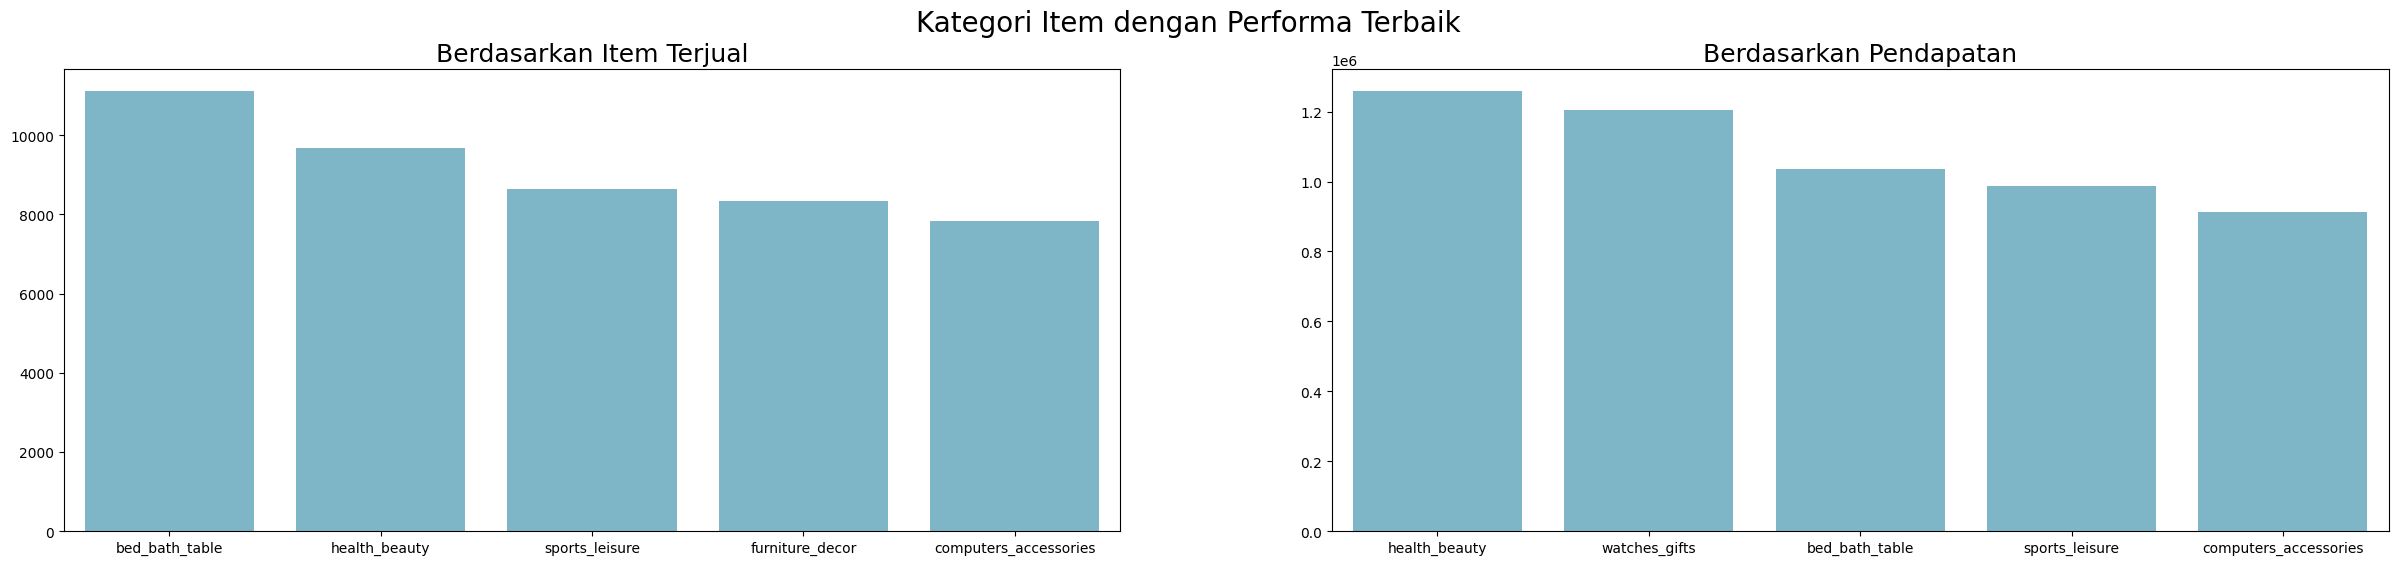

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="total_order", x="product_category_name_english", data=question_one.sort_values(by="total_order", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Item Terjual", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=10)

sns.barplot(y="total_revenue", x="product_category_name_english", data=question_one.sort_values(by="total_revenue", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Pendapatan", loc="center", fontsize=18)
ax[1].tick_params(axis ='x', labelsize=10)

plt.suptitle("Kategori Item dengan Performa Terbaik", fontsize=20)
plt.show()

### Pertanyaan 3 & 4:

<ipython-input-35-3071a6b74541>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="total_order", x="product_category_name_english", data=question_one.sort_values(by="total_order", ascending=True).head(5), palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/

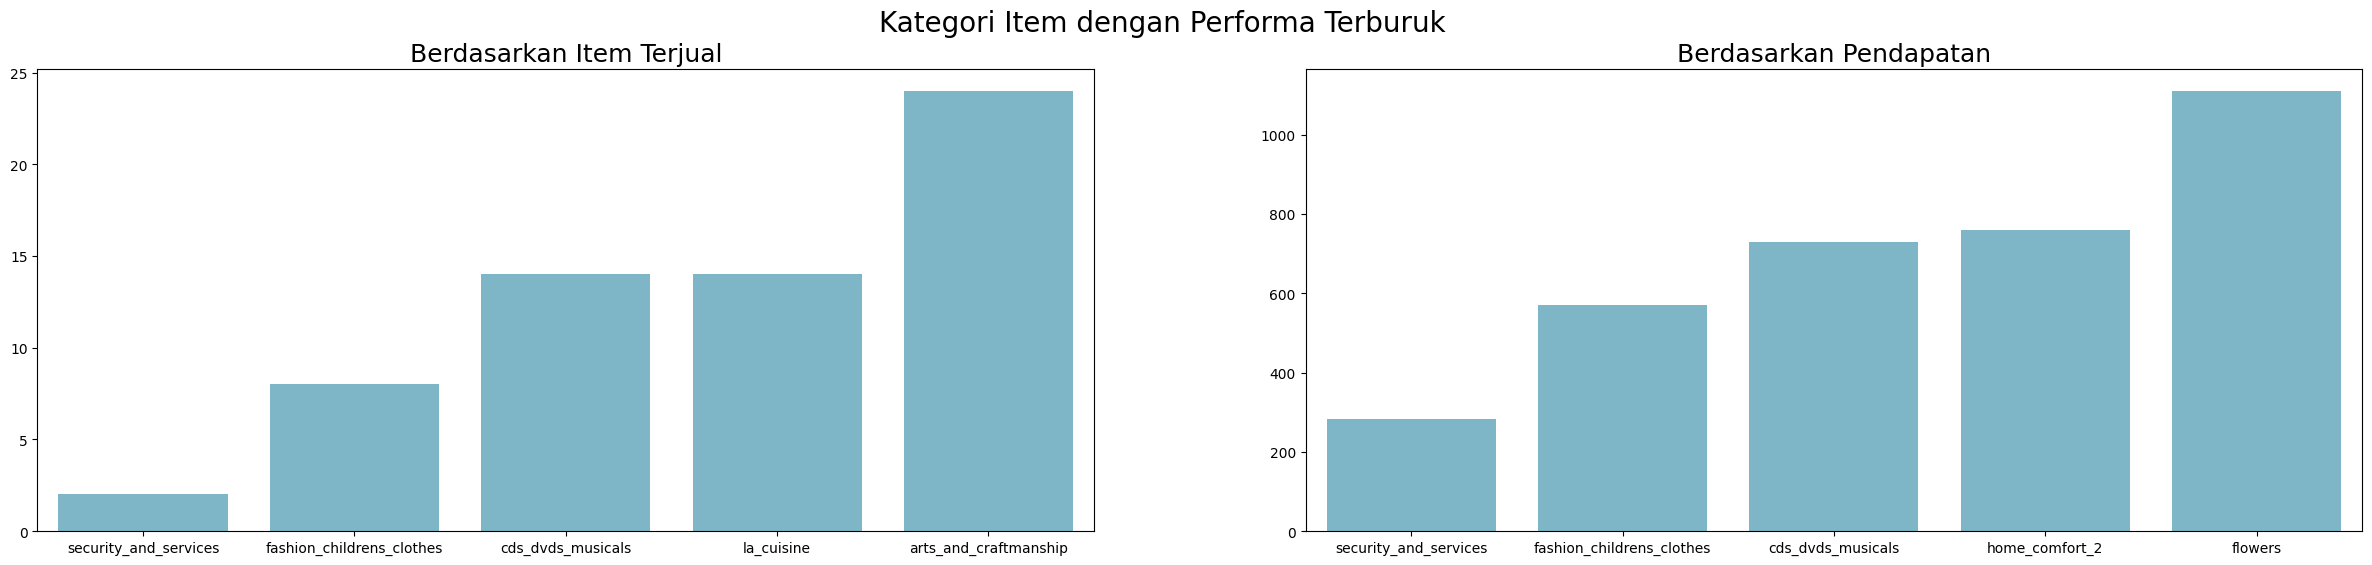

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="total_order", x="product_category_name_english", data=question_one.sort_values(by="total_order", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Item Terjual", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=10)

sns.barplot(y="total_revenue", x="product_category_name_english", data=question_one.sort_values(by="total_revenue", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Pendapatan", loc="center", fontsize=18)
ax[1].tick_params(axis ='x', labelsize=10)

plt.suptitle("Kategori Item dengan Performa Terburuk", fontsize=20)
plt.show()

### Pertanyaan 5, 6, dan 7:

<ipython-input-36-1abcd36cb429>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_unique_id", data=question_two.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.1

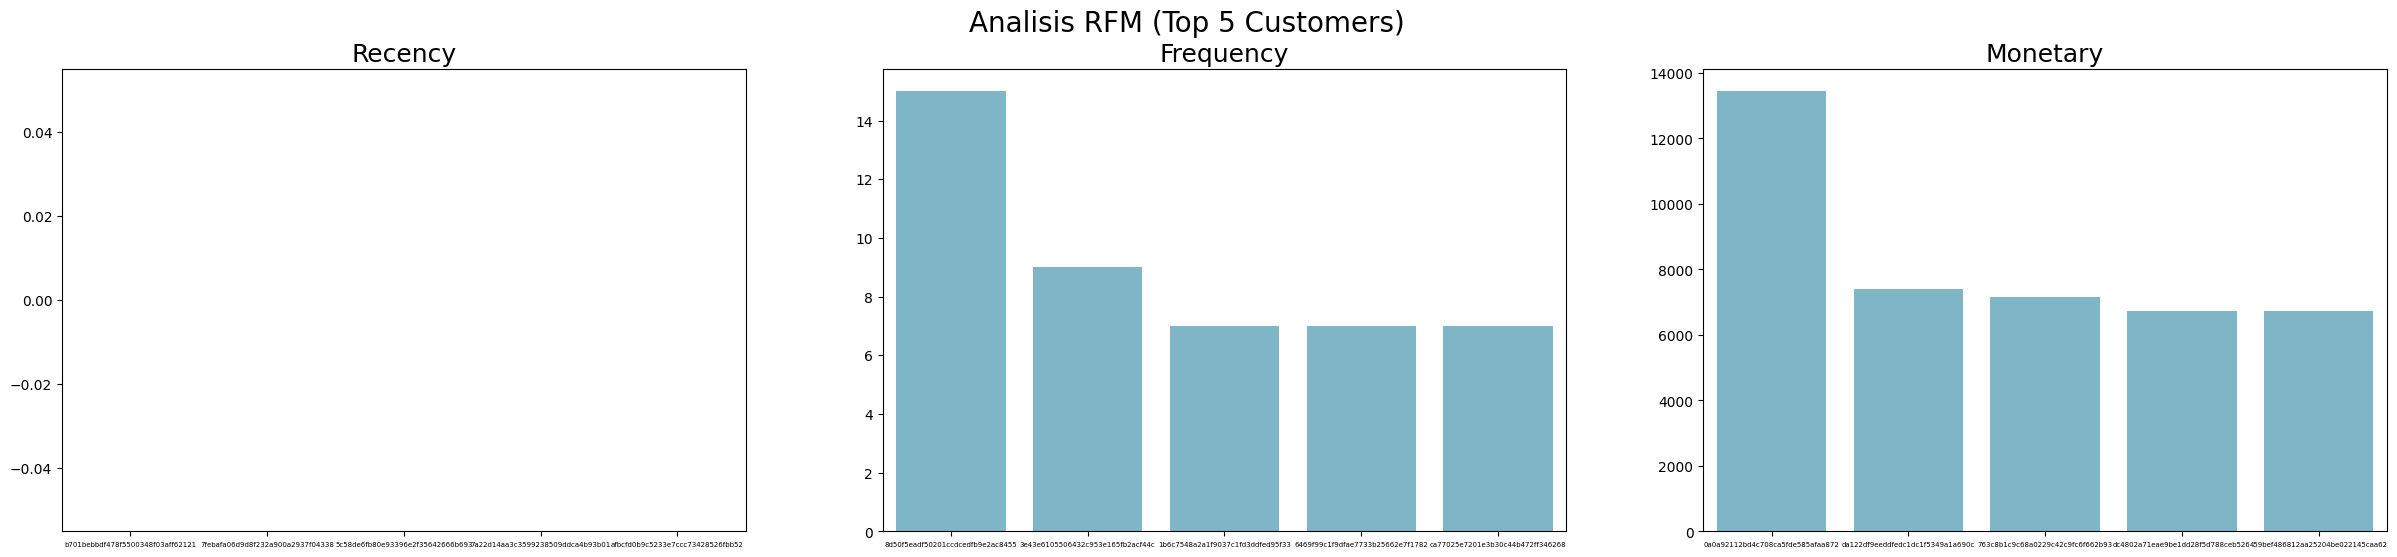

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_unique_id", data=question_two.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Recency", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=5)

sns.barplot(y="frequency", x="customer_unique_id", data=question_two.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis ='x', labelsize=5)

sns.barplot(y="monetary", x="customer_unique_id", data=question_two.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis ='x', labelsize=5)

plt.suptitle("Analisis RFM (Top 5 Customers)", fontsize=20)
plt.show()

**Insight:**
- bed_bath_table adalah kategori dengan penjualan item terbanyak
- health_beauty adalah kategori dengan pendapatan tertinggi
- security_and_services adalah kategori dengan penjualan dan pendapatan terburuk
- Berdasarkan hasil analisis RFM (Top 5) menunjukkan bahwa baik recency, frequency, dan monetary dalam kondisi yang cenderung bagus

## Conclusion

- Pertanyaan bisnis berhasil terjawab semua dengan analisis data
- Hasil analisis dapat divisualisasikan sehingga memudahkan dalam membaca informasi